In [20]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
methods = {'No_deconv':'-o', 
           'FPFS':'-o',
           'Richard-Lucy(10)':':^', 'Richard-Lucy(20)':'-.^', 
           'Richard-Lucy(30)':'-^', 'Richard-Lucy(50)':'--^', 
         #   'Richard-Lucy(100)',
           'Unrolled_ADMM(1)':':^', 'Unrolled_ADMM(2)':'-.^', 
           'Unrolled_ADMM(4)':'-v', 'Unrolled_ADMM(8)':'--v'}
shear_errs=[0, 0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
seeing_errs=[0, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

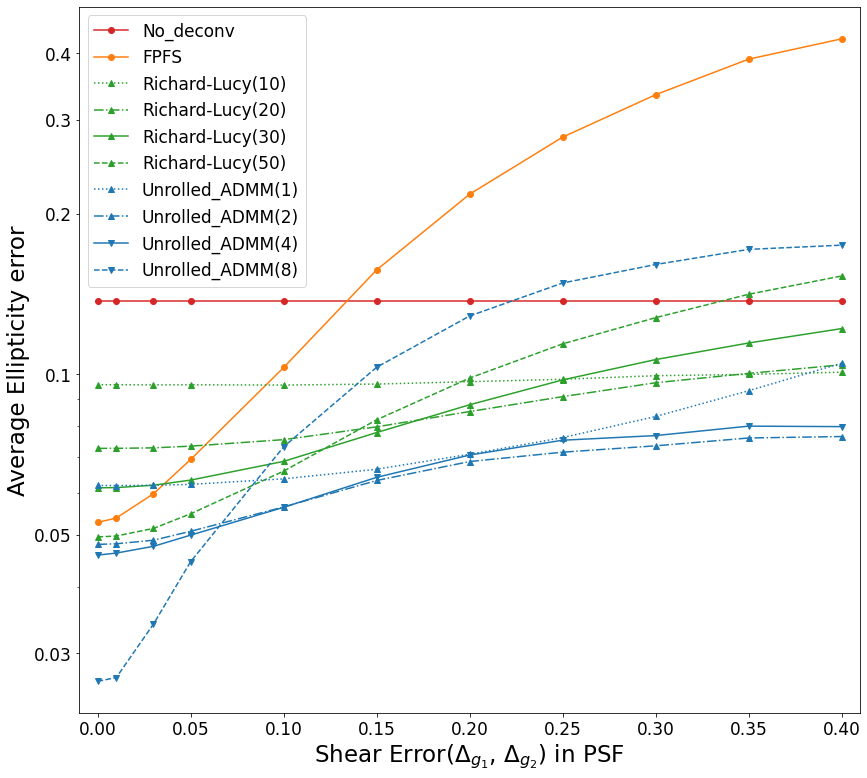

In [22]:
fig, ax1 = plt.subplots(figsize=(14,13), facecolor='white')

for method in methods:
    result_path = os.path.join('results', method)
    results_file = os.path.join(result_path, 'results_psf_shear_err.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results['0']['gt_shear'])
        
    g_errs, g_stds = [], []
    for shear_err in shear_errs:
        rec_err = np.abs(np.array(results[str(shear_err)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))

    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    plt.plot(shear_errs, g_errs, methods[method], label=method, color=color)
    
ax1.set_xlim([-0.01, 0.41])
ax1.set_xlabel('Shear Error($\Delta_{g_1}$, $\Delta_{g_2}$) in PSF', fontsize=23)

ax1.set_yscale('log')
ax1.set_yticks([0.03,0.05,0.1,0.2,0.3,0.4])
ax1.set_yticklabels(['0.03','0.05','0.1','0.2','0.3','0.4'])
ax1.set_ylabel('Average Ellipticity error', fontsize=23)

plt.legend(fontsize=17)
plt.tick_params(labelsize=17)
plt.savefig(os.path.join('figures', 'psf_shear_err.jpg'), bbox_inches='tight')
plt.show()

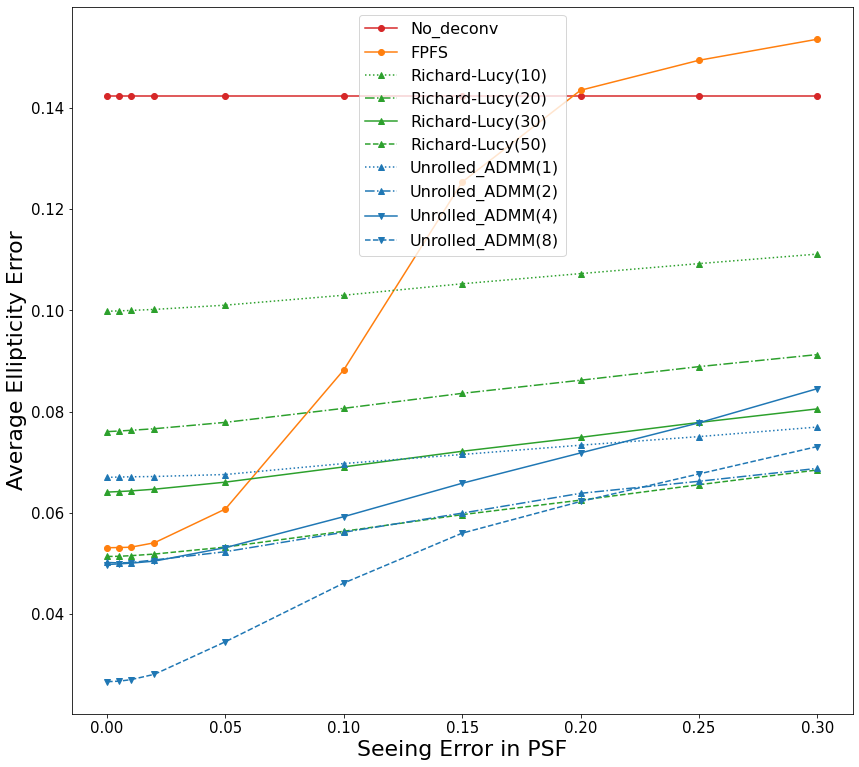

In [23]:
fig, ax1 = plt.subplots(figsize=(14,13))

for method in methods:
    result_path = os.path.join('results', method)
    results_file = os.path.join(result_path, 'results_psf_seeing_err.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results['0']['gt_shear'])
        
    g_errs, g_stds = [], []
    for seeing_err in seeing_errs:
        rec_err = np.abs(np.array(results[str(seeing_err)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))

    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    plt.plot(seeing_errs, g_errs, methods[method], label=method, color=color)

# ax1.set_xlim([0, 0.01])
ax1.set_xlabel('Seeing Error in PSF', fontsize=22)

ax1.set_ylabel('Average Ellipticity Error', fontsize=22)

plt.legend(fontsize=16)
plt.tick_params(labelsize=15)
plt.savefig(os.path.join('figures', 'psf_seeing_err.jpg'), bbox_inches='tight')
plt.show()